Install libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

Load Dataset

In [2]:
df = pd.read_csv('flight_price.csv')
df_test = pd.read_csv('flight_price_test.csv')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_o

In [5]:
df.shape

(10683, 11)

In [6]:
print('Train data null value', df.isnull().sum())
print('Test data null value', df_test.isnull().sum())

Train data null value Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
Test data null value Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [7]:
df = df[df['Route'].notna()]
df = df[df['Total_Stops'].notna()]

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
categorical_data =[k for k in df if df[k].dtype == 'object']

for i in categorical_data:
    columns = df[i].unique()
    print(i,columns)

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route ['BLR ? DEL' 'CCU ? IXR ? BBI ? BLR' 'DEL ? LKO ? BOM ? COK'
 'CCU ? NAG ? BLR

In [10]:
df['Duration'] = pd.to_timedelta(df['Duration'])
### Convert 'timeColumn' to minutes only.
df['columnAsMinutes'] = df['Duration'].dt.total_seconds() / 60
### Drop the old table.
df.drop('Duration', axis = 1, inplace = True)

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,columnAsMinutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,non-stop,No info,3897,170.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,2 stops,No info,7662,445.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,2 stops,No info,13882,1140.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,1 stop,No info,6218,325.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,1 stop,No info,13302,285.0


In [12]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [13]:
df['Total_Stops']=df['Total_Stops'].replace(['non-stop','2 stops','1 stop','3 stops','4 stops'],['0','2','1','3','4'],inplace = False)
df_test['Total_Stops']=df_test['Total_Stops'].replace(['non-stop','2 stops','1 stop','3 stops','4 stops'],['0','2','1','3','4'],inplace = False)

In [14]:
df['Additional_Info']=df['Additional_Info'].replace(['No info','No Info','In-flight meal not included','No check-in baggage included','1 Short layover','1 Long layover','Change airports','Business class','Red-eye flight','2 Long layover'],['no_info','no_info','no_in-flight_meal_include','no_checkin_baggage_include','1_short_layover','1_long_layover','change_airport','business_class','red-eye_flight','2_long_layover'],inplace = False)
df_test['Additional_Info']=df_test['Additional_Info'].replace(['No info','No Info','In-flight meal not included','No check-in baggage included','1 Short layover','1 Long layover','Change airports','Business class','Red-eye flight','2 Long layover'],['no_info','no_info','no_in-flight_meal_include','no_checkin_baggage_include','1_short_layover','1_long_layover','change_airport','business_class','red-eye_flight','2_long_layover'],inplace = False)

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,columnAsMinutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,0,no_info,3897,170.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,2,no_info,7662,445.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,2,no_info,13882,1140.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,1,no_info,6218,325.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,1,no_info,13302,285.0


In [16]:
import datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [17]:
df['Date_of_Journey']=df['Date_of_Journey'].dt.dayofweek

In [18]:
df.drop(['Route'], inplace = True, axis = 1)

In [19]:
df["Arrival_Time"]= df["Arrival_Time"].str.split(" ", n = 1, expand = True)


In [20]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [21]:
def hr_func(ts):
    return ts.hour

df['Dep_Time'] = df['Dep_Time'].apply(hr_func)

In [22]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [23]:
df['Dep_Time'] = df['Dep_Time'].apply(f)

In [24]:
df.drop(['Arrival_Time'], inplace = True, axis = 1)


In [25]:
df.rename(columns = {'Dep_Time':'dept_zone','Date_of_Journey':'journey_day','columnAsMinutes': 'journey_time'}, inplace = True)

In [26]:
df.head()

,Airline,journey_day,Source,Destination,dept_zone,Total_Stops,Additional_Info,Price,journey_time
0,IndiGo,6,Banglore,New Delhi,Night,0,no_info,3897,170.0
1,Air India,5,Kolkata,Banglore,Early Morning,2,no_info,7662,445.0
2,Jet Airways,4,Delhi,Cochin,Morning,2,no_info,13882,1140.0
3,IndiGo,3,Kolkata,Banglore,Eve,1,no_info,6218,325.0
4,IndiGo,3,Banglore,New Delhi,Noon,1,no_info,13302,285.0


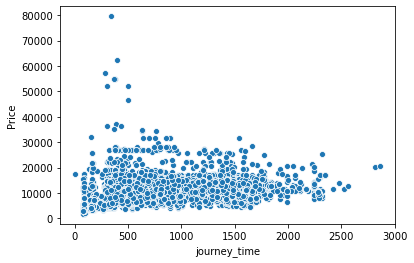

In [27]:
sns.scatterplot(x='journey_time',y='Price',data=df)

In [28]:
#airline vs avg price
#dept_zone vs pric
#addiyion info vd price
#airline vs journey time
#total stop vs price

#unique in source
#unique in destination
#unique in air line
#barplot airline
#barplot dept zone


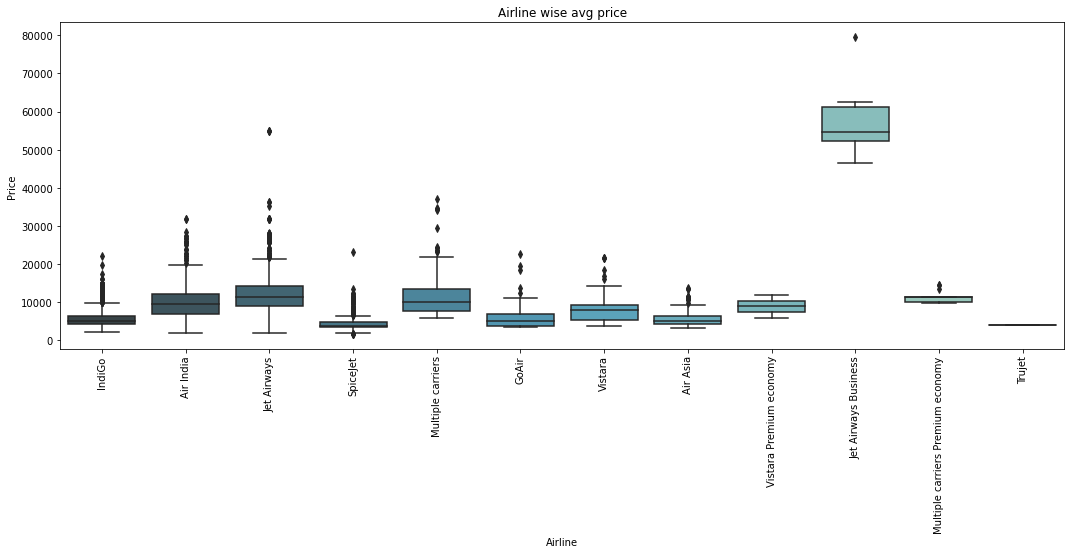

In [29]:
plt.figure(figsize = (18,6))
sns.boxplot(x = 'Airline', y = 'Price', data = df, palette= 'GnBu_d').set_title('Airline wise avg price')

plt.xticks(rotation =90)
plt.show()

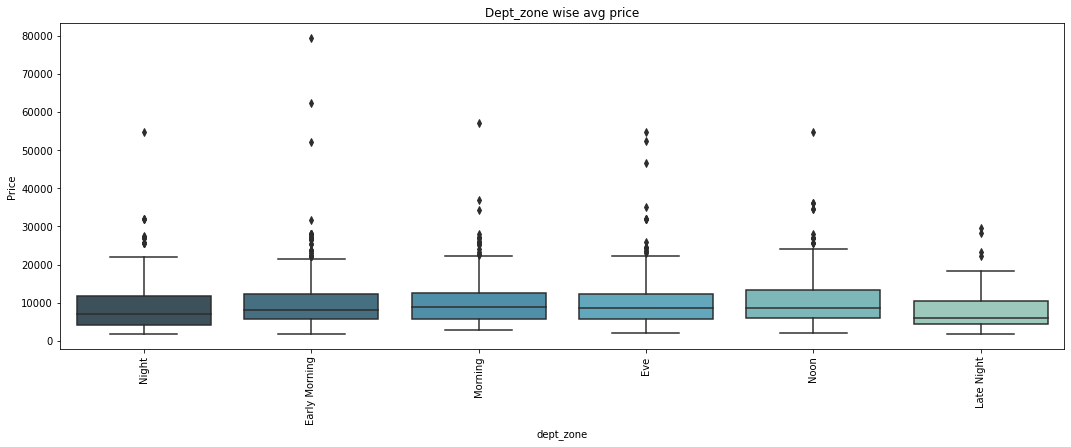

In [30]:
plt.figure(figsize = (18,6))
sns.boxplot(x = 'dept_zone', y = 'Price', data = df, palette= 'GnBu_d').set_title('Dept_zone wise avg price')

plt.xticks(rotation =90)
plt.show()

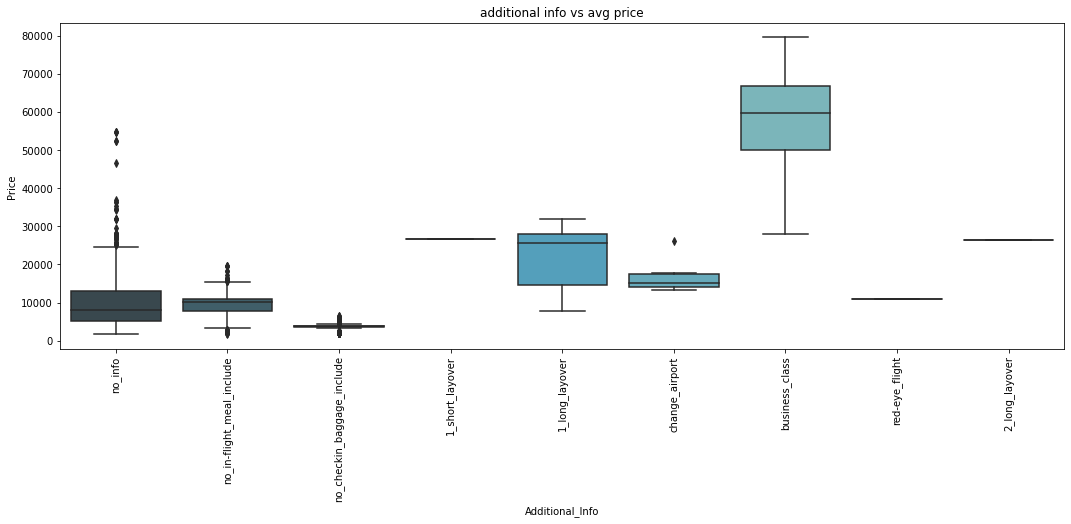

In [31]:
plt.figure(figsize = (18,6))
sns.boxplot(x = 'Additional_Info', y = 'Price', data = df, palette= 'GnBu_d').set_title('additional info vs avg price')

plt.xticks(rotation =90)
plt.show()

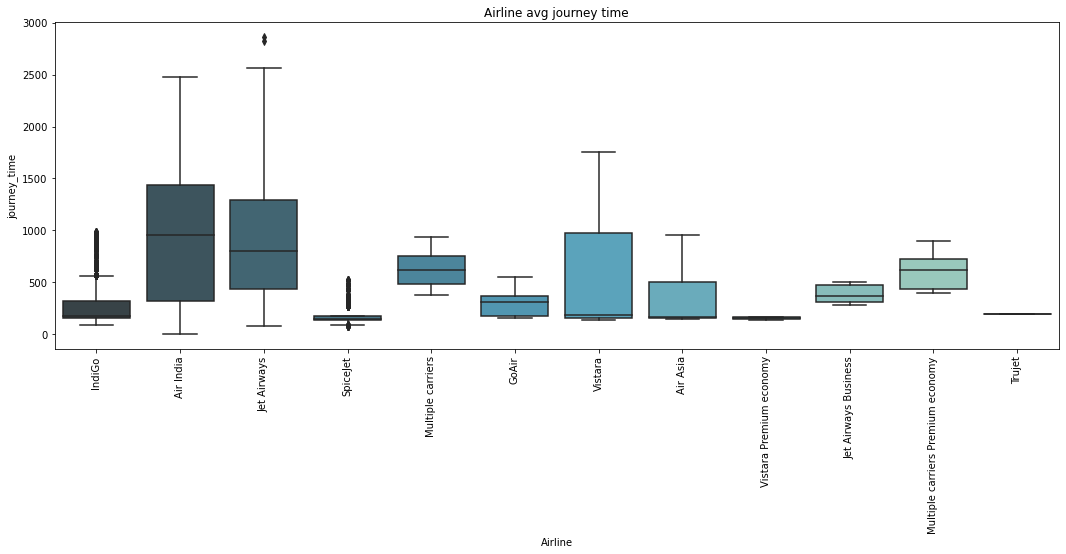

In [32]:
plt.figure(figsize = (18,6))
sns.boxplot(x = 'Airline', y = 'journey_time', data = df, palette= 'GnBu_d').set_title('Airline avg journey time')

plt.xticks(rotation =90)
plt.show()

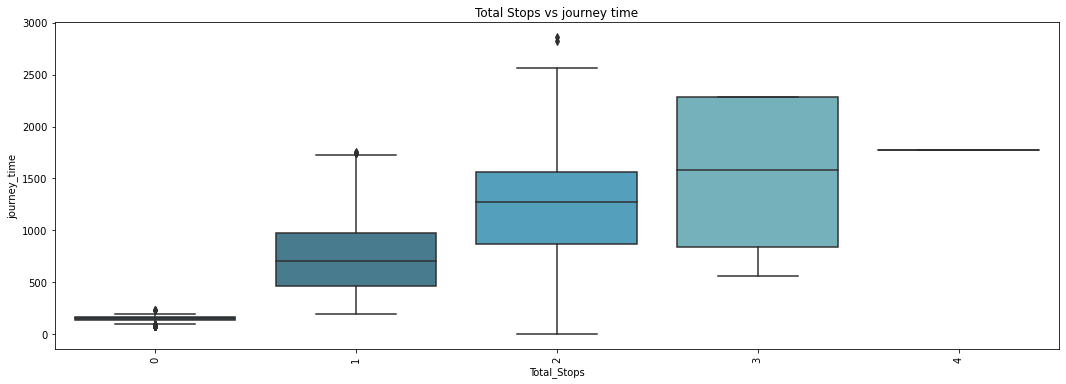

In [33]:
plt.figure(figsize = (18,6))
sns.boxplot(x = 'Total_Stops', y = 'journey_time', data = df, palette= 'GnBu_d').set_title('Total Stops vs journey time')

plt.xticks(rotation =90)
plt.show()

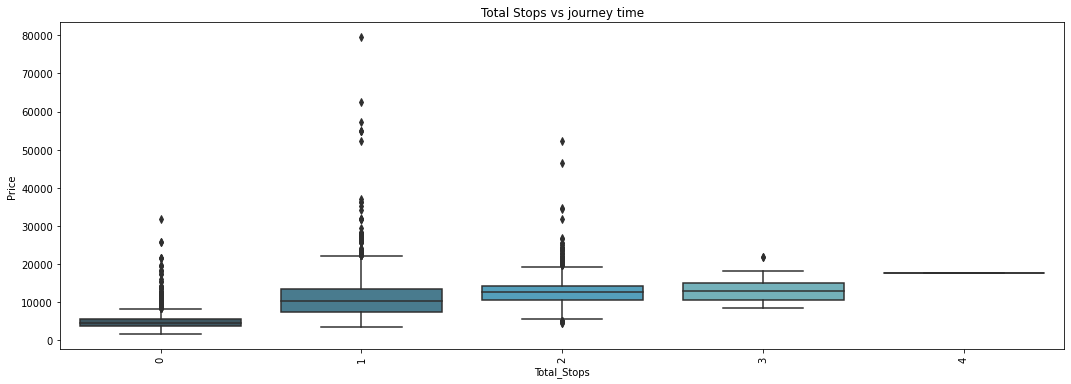

In [34]:
plt.figure(figsize = (18,6))
sns.boxplot(x = 'Total_Stops', y = 'Price', data = df, palette= 'GnBu_d').set_title('Total Stops vs journey time')

plt.xticks(rotation =90)
plt.show()

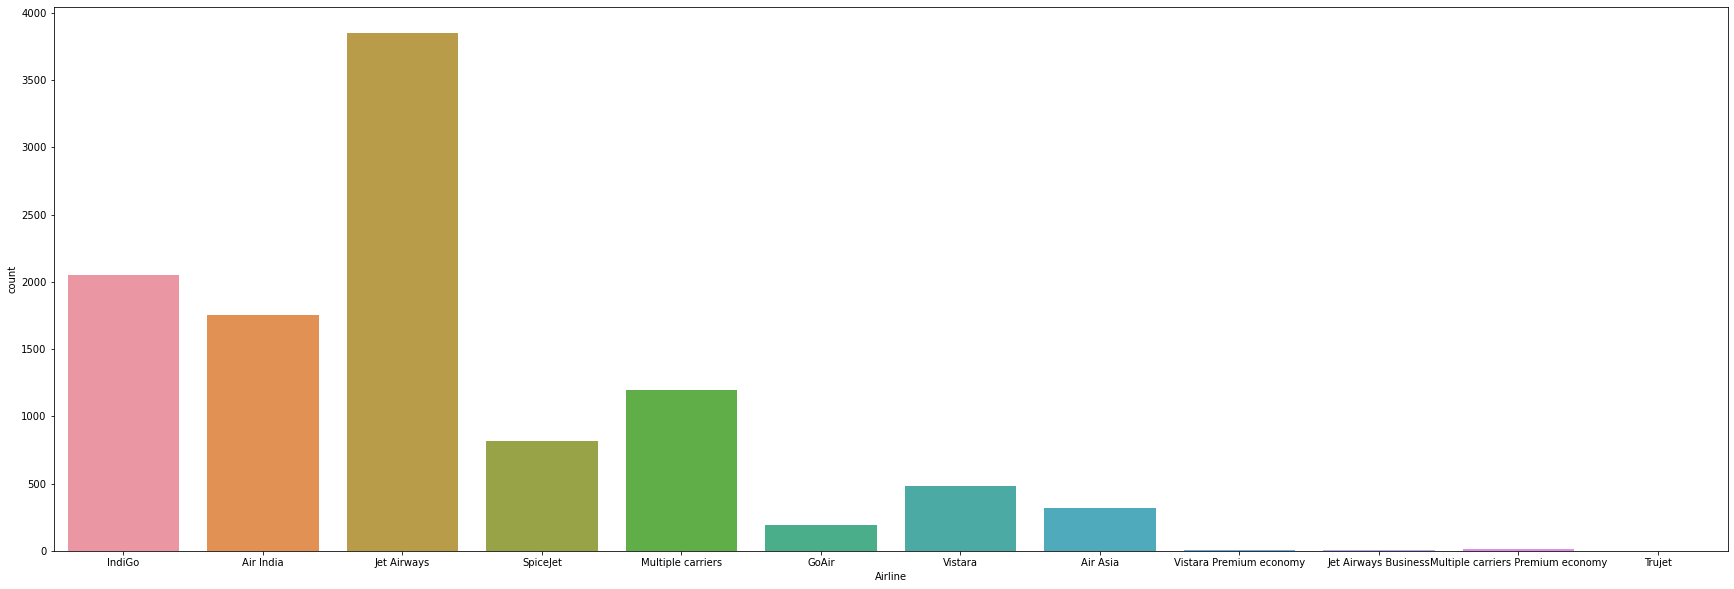

In [35]:
plt.figure(figsize=(30,10))
sns.countplot('Airline',data=df)

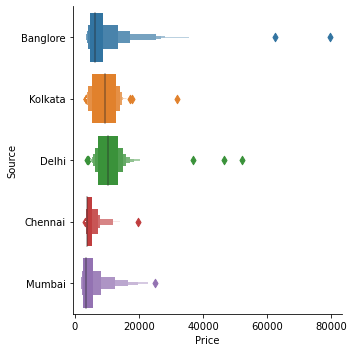

In [36]:
sns.catplot(x='Price',y='Source',data=df,kind='boxen')

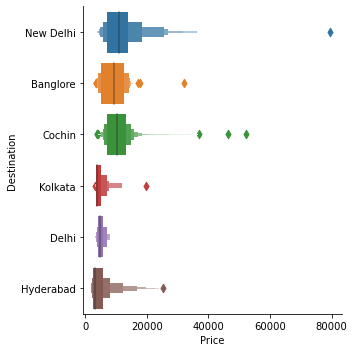

In [37]:
sns.catplot(x='Price',y='Destination',data=df,kind='boxen')

In [38]:
df.shape,df_test.shape

((10682, 9), (2671, 10))

In [39]:
df.dtypes

Airline             object
journey_day          int64
Source              object
Destination         object
dept_zone           object
Total_Stops         object
Additional_Info     object
Price                int64
journey_time       float64
dtype: object

In [40]:
df["Total_Stops"] = df["Total_Stops"].astype(str).astype(int)
df.dtypes

Airline             object
journey_day          int64
Source              object
Destination         object
dept_zone           object
Total_Stops          int32
Additional_Info     object
Price                int64
journey_time       float64
dtype: object

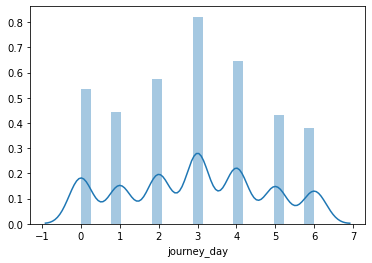

In [41]:
sns_plot = sns.distplot(df["journey_day"])

In [42]:
df.columns

Index(['Airline', 'journey_day', 'Source', 'Destination', 'dept_zone',
       'Total_Stops', 'Additional_Info', 'Price', 'journey_time'],
      dtype='object')

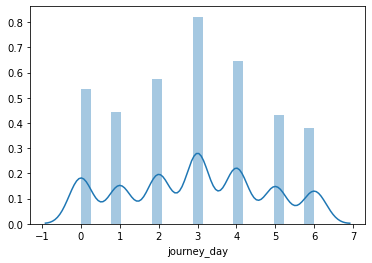

In [43]:
sns_plot = sns.distplot(df["journey_day"])

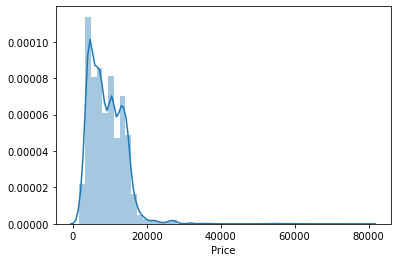

In [44]:
sns_plot = sns.distplot(df["Price"])

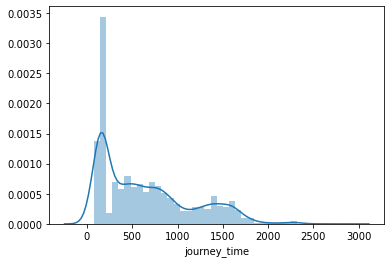

In [45]:
sns_plot = sns.distplot(df["journey_time"])

In [46]:
df.drop(df.index[df['Airline'] == 'Trujet'], inplace = True)

In [47]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy'], dtype=object)

In [48]:
cat_col = df.describe(include='object').columns.to_list()
cat_col

['Airline', 'Source', 'Destination', 'dept_zone', 'Additional_Info']

In [49]:
df = pd.get_dummies(df)

In [50]:
df.head()

,journey_day,Total_Stops,Price,journey_time,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,dept_zone_Noon,Additional_Info_1_long_layover,Additional_Info_1_short_layover,Additional_Info_2_long_layover,Additional_Info_business_class,Additional_Info_change_airport,Additional_Info_no_checkin_baggage_include,Additional_Info_no_in-flight_meal_include,Additional_Info_no_info,Additional_Info_red-eye_flight
0,6,0,3897,170.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,2,7662,445.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4,2,13882,1140.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,3,1,6218,325.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,1,13302,285.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [51]:
df.shape

(10681, 41)

In [52]:
df.dtypes

journey_day                                     int64
Total_Stops                                     int32
Price                                           int64
journey_time                                  float64
Airline_Air Asia                                uint8
Airline_Air India                               uint8
Airline_GoAir                                   uint8
Airline_IndiGo                                  uint8
Airline_Jet Airways                             uint8
Airline_Jet Airways Business                    uint8
Airline_Multiple carriers                       uint8
Airline_Multiple carriers Premium economy       uint8
Airline_SpiceJet                                uint8
Airline_Vistara                                 uint8
Airline_Vistara Premium economy                 uint8
Source_Banglore                                 uint8
Source_Chennai                                  uint8
Source_Delhi                                    uint8
Source_Kolkata              

In [53]:
from scipy.stats import boxcox
for col in df:
    if df[col].skew() >= 1:
        df[col]=np.cbrt(df[col]) ## For Right skewed data we use log,square root,cube root transformation
    if df[col].skew()<= -1:
        df[col]=np.power(df[col],2)
        

In [54]:
df.skew()

journey_day                                    -0.000224
Total_Stops                                     0.317169
Price                                           0.170043
journey_time                                    0.861282
Airline_Air Asia                                5.524683
Airline_Air India                               1.815750
Airline_GoAir                                   7.217328
Airline_IndiGo                                  1.562454
Airline_Jet Airways                             0.581790
Airline_Jet Airways Business                   42.162383
Airline_Multiple carriers                       2.461381
Airline_Multiple carriers Premium economy      28.615496
Airline_SpiceJet                                3.184846
Airline_Vistara                                 4.398969
Airline_Vistara Premium economy                59.651765
Source_Banglore                                 1.456428
Source_Chennai                                  5.007809
Source_Delhi                   

In [55]:
df.shape

(10681, 41)

In [56]:
x = df.drop("Price", axis=1)
y = df["Price"]

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 40)

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [60]:
dtr=DecisionTreeRegressor()
svr=SVR()
svrl=SVR(kernel='linear')
kn=KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor()
ad=AdaBoostRegressor()
rf = RandomForestRegressor()
gd=GradientBoostingRegressor()
lm = LinearRegression()

In [61]:
def fun(f):
    f.fit(X_train,y_train)
    pred=f.predict(X_test)
    print('Training score',(f.score(X_train, y_train)))
    print('Testing score', (f.score(X_test, y_test)))
    print('MAE:', metrics.mean_absolute_error(y_test,pred))
    print('MSE:', metrics.mean_squared_error(y_test,pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

In [62]:
fun(lm)

Training score 0.7420076373898228
Testing score -3.7442592281038646e+22
MAE: 14101032416.106308
MSE: 4.249191891019963e+23
RMSE: 651858258444.2697


In [63]:
fun(svr)

Training score 0.7794350988188905
Testing score 0.7569521183719742
MAE: 1.0615450105153121
MSE: 2.7582414165976084
RMSE: 1.6607954168402586


In [64]:
fun(svrl)

Training score 0.7330074119966546
Testing score 0.688213702300858
MAE: 1.3161839674656317
MSE: 3.5383228756446012
RMSE: 1.8810430286531463


In [65]:
fun(kn)

Training score 0.8646146731195219
Testing score 0.7606836678555541
MAE: 1.0665548131472136
MSE: 2.715893734878474
RMSE: 1.6479968855791185


In [66]:
fun(rf)

Training score 0.9400111653767045
Testing score 0.7878170428869874
MAE: 0.9630406098711944
MSE: 2.4079692292935424
RMSE: 1.551763264577926


In [67]:
fun(lm)

Training score 0.7420076373898228
Testing score -3.7442592281038646e+22
MAE: 14101032416.106308
MSE: 4.249191891019963e+23
RMSE: 651858258444.2697


In [68]:
fun(ad)

Training score 0.6128868740758893
Testing score 0.5934314603668562
MAE: 1.6734267013342268
MSE: 4.613964035358345
RMSE: 2.148013974665515


In [69]:
fun(gd)

Training score 0.8081148650529641
Testing score 0.7767119040448596
MAE: 1.1142957940587108
MSE: 2.533996470042353
RMSE: 1.5918531559293883


In [70]:
ad1=AdaBoostRegressor(n_estimators=500,learning_rate=1,random_state=0)
fun(ad1)

Training score 0.6123131881268637
Testing score 0.5953934106995676
MAE: 1.6929238902713517
MSE: 4.591698740846236
RMSE: 2.1428249440507816


In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
for i in range(2,8):
    crs_score=cross_val_score(lm,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 73.13223332410944
CV Value 3
Score 73.25994099403411
CV Value 4
Score 73.28991933328776
CV Value 5
Score 73.24907711649612
CV Value 6
Score 73.27725831376888
CV Value 7
Score 73.28099381359426


In [73]:
for i in range(2,8):
    crs_score=cross_val_score(svr,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 52.950434606130955
CV Value 3
Score 53.14725443059907
CV Value 4
Score 53.2770369942772
CV Value 5
Score 53.25321849149521
CV Value 6
Score 53.29409013858618
CV Value 7
Score 53.29039429778837


In [74]:
for i in range(2,8):
    crs_score=cross_val_score(svr,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 52.950434606130955
CV Value 3
Score 53.14725443059907
CV Value 4
Score 53.2770369942772
CV Value 5
Score 53.25321849149521
CV Value 6
Score 53.29409013858618
CV Value 7
Score 53.29039429778837


In [75]:
for i in range(2,8):
    crs_score=cross_val_score(rf,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 79.5766666004041
CV Value 3
Score 79.98406135650424
CV Value 4
Score 80.7340034309248
CV Value 5
Score 80.66959443420598
CV Value 6
Score 80.65976828467915
CV Value 7
Score 80.6874757095194


In [76]:
for i in range(2,8):
    crs_score=cross_val_score(ad,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 51.52287668523944
CV Value 3
Score 55.58892488692319
CV Value 4
Score 55.34459972747655
CV Value 5
Score 57.83947238260039
CV Value 6
Score 57.2714910539525
CV Value 7
Score 58.705604929983245


In [77]:
for i in range(2,8):
    crs_score=cross_val_score(gd,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 79.06953592746895
CV Value 3
Score 79.20675071742397
CV Value 4
Score 79.28464673335182
CV Value 5
Score 79.22242719532899
CV Value 6
Score 79.30195695248051
CV Value 7
Score 79.32552244856765


In [78]:
for i in range(2,8):
    crs_score=cross_val_score(ad1,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 55.15232183959438
CV Value 3
Score 56.36256776295136
CV Value 4
Score 55.721605955632356
CV Value 5
Score 57.38316011047129
CV Value 6
Score 57.500879815630256
CV Value 7
Score 56.49075562007214


In [79]:
sd=pd.DataFrame({'column name':['lm','svr','svrl','kn','rf','ad','gd','ad1']})

In [81]:
sd['Training score']=[0.74,0.77,0.73,0.86,0.93,0.61,0.80,0.61]
sd['Testing score']=[-3.74,0.75,0.68,0.76,0.78,0.60,0.77,0.59]
sd['MAE']=[141010,1.06,1.31,1.06,0.96,1.67,1.11,1.69]
sd['MSE']=[4.24,2.75,3.53,2.71,2.39,4.51,2.53,4.59]
sd['RMSE']=[6518582,1.66,1.88,1.64,1.54,2.21,1.59,2.14]


In [82]:
sd

,column name,Training score,Testing score,MAE,MSE,RMSE
0,lm,0.74,-3.74,141010.00,4.24,6518582.00
1,svr,0.77,0.75,1.06,2.75,1.66
2,svrl,0.73,0.68,1.31,3.53,1.88
3,kn,0.86,0.76,1.06,2.71,1.64
4,rf,0.93,0.78,0.96,2.39,1.54
5,ad,0.61,0.60,1.67,4.51,2.21
6,gd,0.80,0.77,1.11,2.53,1.59
7,ad1,0.61,0.59,1.69,4.59,2.14


Here, we will go with random forest as it have good training and testing score as well as CV score with low error

In [83]:
import pickle
filename='flightprice.pkl'
pickle.dump(rf,open(filename,'wb'))

         Actual    Predict
635   16.849889  15.316604
6405  18.656812  19.216528
4130  17.835958  18.740346
5282  18.980590  19.386392
8537  21.166477  23.536164
...         ...        ...
7521  24.389479  22.714134
3158  15.660830  15.641331
8156  15.798248  15.817350
9528  26.837154  25.989646
4258  26.788935  25.615447

[2137 rows x 2 columns]


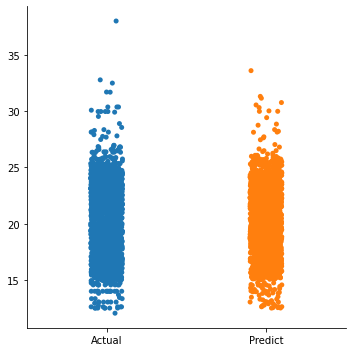

In [85]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rf.predict(X_test)
print(res)
sns.catplot(data=res)